## Introducción
Este notebook guía al usuario paso a paso a través del flujo general de trabajo con Nook’iin, desde la carga de librerías hasta la visualización del espacio recíproco y patrón de difracción. Es ideal para comprender el uso completo de la herramienta antes de revisar ejemplos más específicos.

## Carga de librerías y paquetes
El primer paso en el uso de la herramienta Nook’iin para obtener la celda mínima de un sistema 2D apilado es cargar todas las librerías requeridas, importando el archivo System desde la carpeta src.

In [1]:
import sys
import os

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

from System import *

Load System
Nook'iin Ready-to-work


## Creación de redes 2D
Los objetos Lattice modelan los cristales que conforman el sistema que deseamos simular. Existen dos formas de crear redes:

Creación manual: se indican los vectores primitivos (PV) y la base atómica (una lista de objetos Atom con sus posiciones relativas respecto a los PVs).

Creación asistida: se utilizan funciones como hexa3(), hexa6(), o rectLattice() para generar redes con simetría hexagonal (S3, S6) o rectangular. También hay funciones predefinidas como graphene(), grapheneC3(), blackPhosphorene() y h_BN().

A continuación, se muestra cómo construir manualmente la red de beta-GeSe:

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
b-GeSe
1.0
        3.8261001110         0.0000000000         0.0000000000
        0.0000000000         5.8088998795         0.0000000000
        0.0000000000         0.0000000000         18.0892009735
	Ge	Se
	2	2
Direct
         0.7500000000         0.3677821160         0.1606478230
         0.2500000000         0.8684009310         0.0634941810
         0.7500000000         0.8466233610         0.1609372630
         0.2500000000         0.3469434380         0.0631845500
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


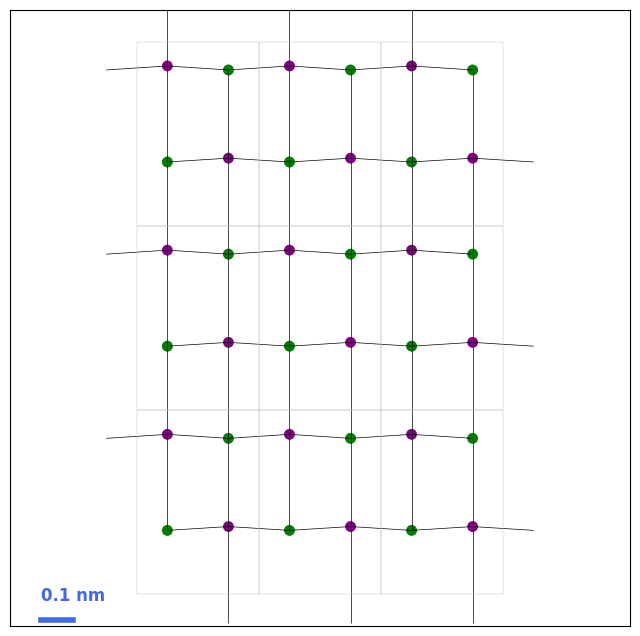

In [3]:
# Definimos las posiciones relativas de los átomos en la base atómica
pos1,pos2,pos3,pos4=(0.750000000,0.367782116),(0.250000000,0.868400931),(0.750000000,0.846623361),(0.250000000,0.346943438)

# Inicializamos los átomos
atomos=[Atom(pos1,posZ=0.160547823,color='purple',sig='Ge'),
        Atom(pos2,posZ=0.063394181,color='purple',sig='Ge'),
        Atom(pos3,posZ=0.160837263,color='green',sig='Se'),
        Atom(pos4,posZ=0.063084550,color='green',sig='Se')]

# Enlaces opcionales para visualización
enlaces=[(pos1,pos3),(pos1,pos4),(pos1,sumaV(pos4,(1,0))),(pos1,sumaV(pos3,(0,-1))),
         (pos2,pos4),(pos2,pos3),(pos2,sumaV(pos3,(-1,0))),(pos2,sumaV(pos4,(0,1)))]

# Vectores primitivos
vA, vB = (3.8261001110,0.0000000000), (0.0000000000,5.8088998795)

# Inicialización de la red
bGeSe = Lattice(vA,vB,atms=atomos,enls=enlaces,detachment=18.0892009735,name='b-GeSe')

# Visualización
print("+-"*40+"\n"+bGeSe.showData()+"\n"+"+-"*40)
bGeSe.showme(x=3,y=3)

También es posible importar redes desde archivos POSCAR, en este caso desde los archivos FePS3 y graphene en la carpeta /VASP-FILES:

File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/FePS3.vasp' will be read
--Lattice created successfully from file 'C:\SS\Nook’iin\Nook-iin\VASP_Files/FePS3.vasp'--
File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/graphene.vasp' will be read
--Lattice created successfully from file 'C:\SS\Nook’iin\Nook-iin\VASP_Files/graphene.vasp'--
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
FePS3
1.0
        5.9314999580         0.0000000000         0.0000000000
        -2.9657499790         5.1368296462         0.0000000000
        0.0000000000         0.0000000000         20.0000000000
	Fe	P	S
	2	2	6
Direct
         0.0000000000         0.0000000000         0.5001000000
         0.6666666870         0.3333333430         0.5001000000
         0.3333333430         0.6666666870         0.4451491070
         0.3333333430         0.6666666870         0.5550508930
         0.3333333430         0.3302960990         0.4212900530
         0.3333333430         0.0030372400         0.578

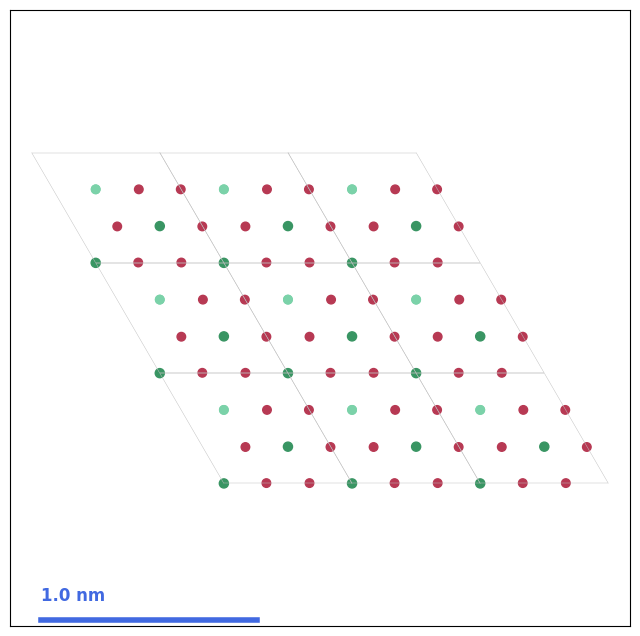

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Graphene
1.0
        2.4672000408         0.0000000000         0.0000000000
        -1.2336000204         2.1366579116         0.0000000000
        0.0000000000         0.0000000000         5.0000000000
	C
	2
Direct
         0.3333333430         0.6666666870         0.1001000000
         0.6666666870         0.3333333430         0.1001000000
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


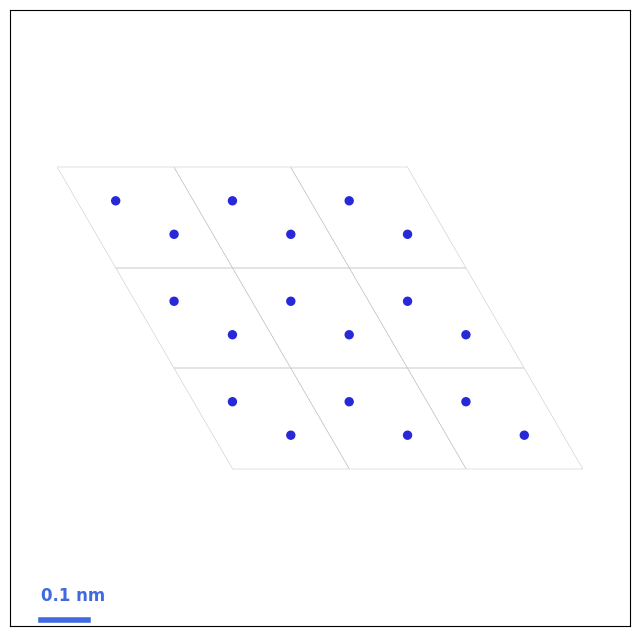

In [4]:
VASP_Files = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'VASP_Files'))
# Importamos desde archivos tipo POSCAR (formato 'direct')
l1 = importLattice(VASP_Files+"/FePS3")
l2 = importLattice(VASP_Files+"/graphene")

# Asignamos nombres
l1.name="FePS3"
l2.name="Graphene"

# Visualización
print("+-"*40+"\n"+l1.showData()+"\n"+"+-"*40)
l1.showme(x=3,y=3)
print("+-"*40+"\n"+l2.showData()+"\n"+"+-"*40)
l2.showme(x=3,y=3)

## Resolviendo Celda primitiva para un Sistema
### Inicialización de System
El primer paso es modelar el sistema, para esto se inicializa un objeto System a partir de una lista de redes.
Si se requiere podemos aplicar una rotación a alguna de las capas con la función mRot(θ).

Para este ejemplo modelaremos un sistema formado por la apilación de FePS3 y grafeno con una rotación relativa entre ellos de $24.07^o$, para esto haremos uso de las redes ya importadas.

In [5]:
sr = System([l1, l2.mRot(24.07)])

### Búsqueda de celda primitiva (PC)
Una vez modelado el sistema podemos buscar una celda primitiva (PC) para este usando:

 - searchLP(rangeOfSearch, epsilon): genera posibles vectores primitivos.

 - calculateTM(): genera las matrices de transformación correspondientes.

 - ShowTMs(): muestra tablas con las PCs sugeridas.


A continuacion haremos una búsqueda de posibles PCs para el sistema definido en un área de búsqueda equivalente a un radio de 10 veces la PC del FePS3 (rangeOfSearch=10) y con una deformación aceptada máxima de aproximadamente 1% (epsilon=0.01).

Finalmente observaremos las Matgrices de Transformación (TM) correspondientes a las posibles PCs calculadas. 

In [6]:
sr.searchLP(rangeOfSearch=10, epsilon=0.01)
sr.calculateTM()
sr.ShowTMs()


***Option 1: T <- Matrix loMat[0]
Size of the primitive vectors: |a|=33.02519Å, |b|=33.02519Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   6   -1|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  310   |
|          FePS3          |  |   1    5|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  11    4|  |  | 0.99293  0.00403|  |   -0.505% // -0.2°    |  362   |
|    Graphene(24.07°)     |  |  -4   15|  |  |-0.00403  0.99696|  |   -0.505% // -0.2°    |        |
|                         |               |                      

[[9, 5], [-5, 14]]

### Resultados destacados
Tras analizar los resultados resaltan 2 de ellos, el primero es el sugerido por el programa al ser el de menor distorsion en la capa del grafeno, el segundo es el que genera la PC de menor tamaño.

------------------------------------------------------------------------------------
##### <center>Resultado sugerido<center>
|$$\text{Lattice}$$|$$\text{T}$$|$$\text{M.Deformation}$$|$$\text{delta//theta}$$|$$\text{\#Atoms}$$|
|-------|-|-------------|------------|--------|
|FePS3|$$\begin{matrix}9&5\\-5&14\end{matrix}$$|$$\begin{matrix}1&0\\0&1\end{matrix}$$|$$\begin{matrix}0.000\%\text{  }//\text{  }0.0^o\\0.000\%\text{  }//\text{  }0.0°\end{matrix}$$|1510|
|Graphene(24.07°)|$$\begin{matrix}-9&24\\-24&33\end{matrix}$$|$$\begin{matrix}0.99988&-0.00003\\0.00003&0.99985\end{matrix}$$|$$\begin{matrix}-0.013\%\text{  }//\text{  }0.0^o\\-0.013\%\text{  }//\text{  }0.0^o\end{matrix}$$|1746|

---------------------------------------------------------------------------------
##### <center>Resultado más pequeño<center>
|$$\text{Lattice}$$|$$\text{T}$$|$$\text{M.Deformation}$$|$$\text{delta//theta}$$|$$\text{\#Atoms}$$|
|-------|-|-------------|------------|--------|
|FePS3|$$\begin{matrix}6&-1\\1&5\end{matrix}$$|$$\begin{matrix}1&0\\0&1\end{matrix}$$|$$\begin{matrix}0.000\%\text{  }//\text{  }0.0^o\\0.000\%\text{  }//\text{  }0.0°\end{matrix}$$|310|
|Graphene(24.07°)|$$\begin{matrix}11&-4\\4&15\end{matrix}$$|$$\begin{matrix}0.99293&0.00403\\-0.00403&0.99696\end{matrix}$$|$$\begin{matrix}-0.505\%\text{  }//\text{  }-0.2^o\\-0.505\%\text{  }//\text{  }-0.2^o\end{matrix}$$|362|

----------------------------------------------------------------------------------
Con el primer resultado el número de átomos es igual a $3256$ con una disminución en la longitud de los VPs de la segunda capa del 0.013%, mientras que el segundo, a coste de una reducción del $0.505\%$ y correción en el ángulo de $-0.2°$ en sus VPs reduce este número hasta $672$.

A continuación crearán sistemas con ambos resultados para ser mostrados comenzando con el resultado sugerido. Comenzamos con el correspondiente a la PC más pequeña:

Size of the primitive vectors: |a|=33.02519Å, |b|=33.02519Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   6   -1|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  310   |
|          FePS3          |  |   1    5|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  11    4|  |  | 0.99293  0.00403|  |   -0.505% // -0.2°    |  362   |
|    Graphene(24.07°)     |  |  -4   15|  |  |-0.00403  0.99696|  |   -0.505% // -0.2°    |        |
|                         |               |                       |                       |        |

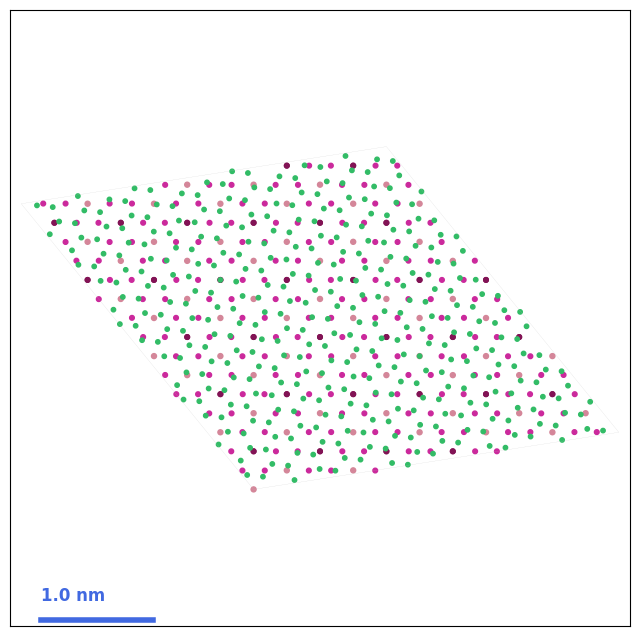

Image address: 'C:\SS\Nook’iin\NookIin-beta\Examples\Español\Images/FePS3-Grahene24_07-A(3x3).png'


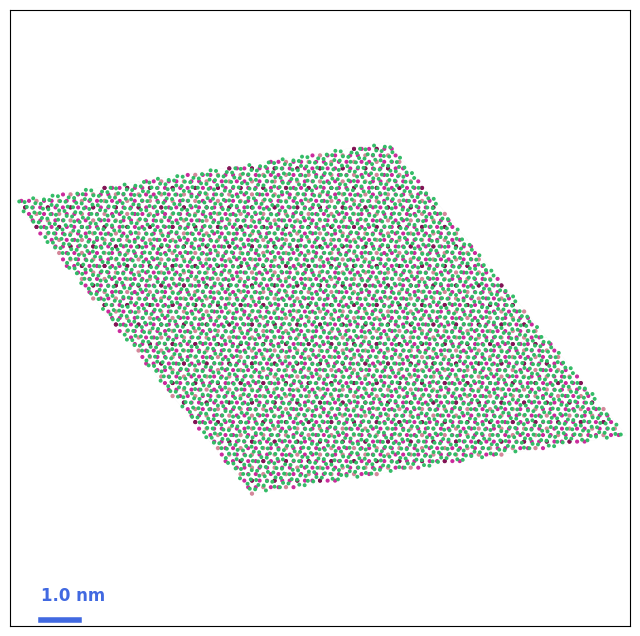

In [7]:
sMi,D = sr.optimize_system(sr.loMat[0],prnt=False)
sr.describeTM(sr.loMat[0])
sMi.SuperRed.showme(t=3)
sMi.SuperRed.showme(x=3,y=3,t=1, iName='FePS3-Grahene24_07-A(3x3)')

Resultado con menor deformación:

Size of the primitive vectors: |a|=72.88749Å, |b|=72.88749Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   9    5|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  1510  |
|          FePS3          |  |  -5   14|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |   9   24|  |  | 0.99988 -0.00003|  |   -0.013% // +0.0°    |  1746  |
|    Graphene(24.07°)     |  | -24   33|  |  | 0.00003  0.99985|  |   -0.013% // +0.0°    |        |
|                         |               |                       |                       |        |

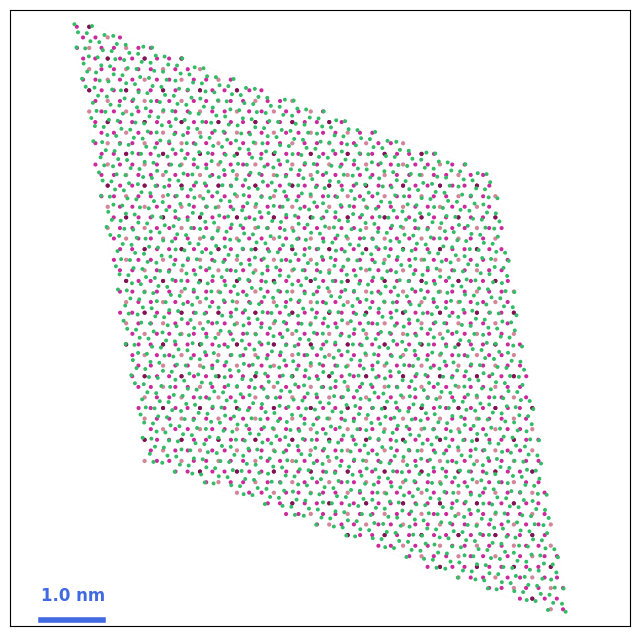

Image address: 'C:\SS\Nook’iin\NookIin-beta\Examples\Español\Images/FePS3-Grahene24_07-B(3x3).png'


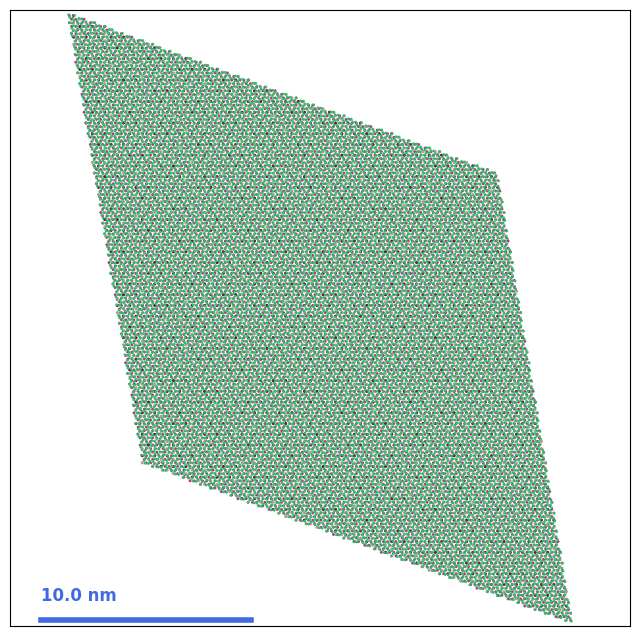

In [8]:
sOp,_ = sr.optimize_system(sr.loMat[9],prnt=False)
sr.describeTM(sr.loMat[9])
sOp.SuperRed.showme(t=1)
sOp.SuperRed.showme(x=3,y=3,t=0.3, iName='FePS3-Grahene24_07-B(3x3)')

### Exportar resultado
Para exportar a un archivo POSCAR la PC calculada usamos la funcion export_PC()

In [9]:
sMi.exportPC(PCname='FePS3-Grahene24_07(min)')
sOp.exportPC(PCname='FePS3-Grahene24_07(opt)')

Lattice exported in:'C:\SS\Nook’iin\NookIin-beta\Examples\Español\VASP_Files/FePS3-Grahene24_07(min).vasp'
Lattice exported in:'C:\SS\Nook’iin\NookIin-beta\Examples\Español\VASP_Files/FePS3-Grahene24_07(opt).vasp'


1

## Espacio recíproco y patrón de difracción
Con una PC definida, se pueden generar representaciones del espacio recíproco y del patrón de difracción.

La representación en el espacio reciproco consiste de una superpocición de las FBZ de cada red que compone al sistema en una retucula formada por la FPZ del sistema correspondiente a su PC.

Para visualizar la representación en el espacio reciproco del sistema se usa la función showReciprocalSpace()

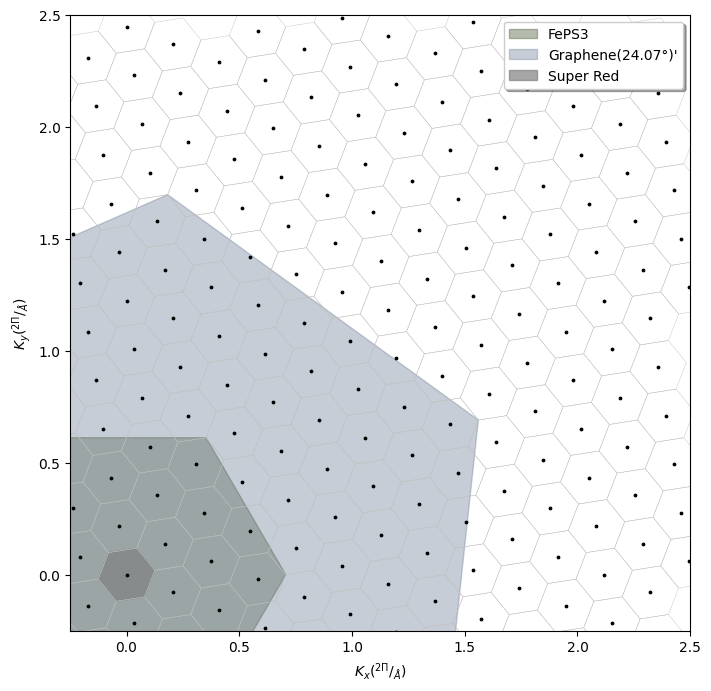

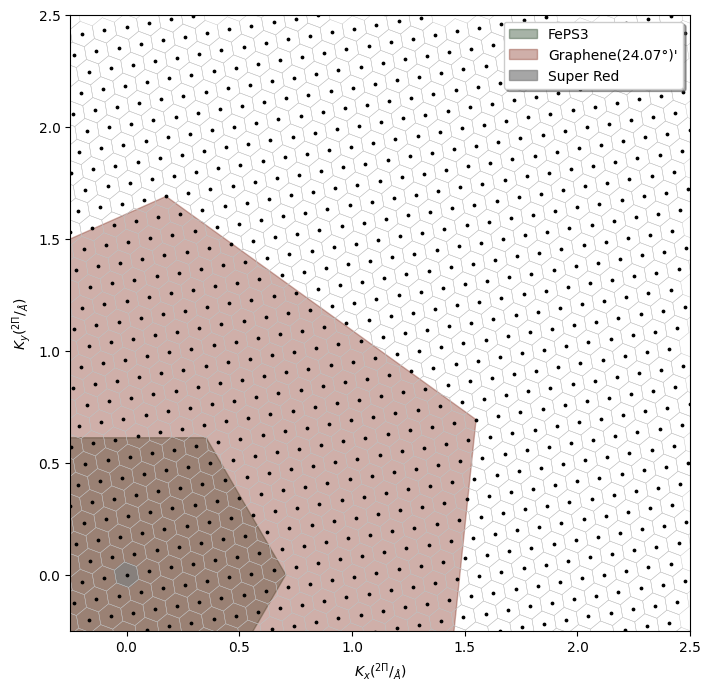

In [10]:
sMi.showReciprocalSpace(t=3,zoom=True)
sOp.showReciprocalSpace(t=3,zoom=True)

Para visualizar el patrón de difracción se utiliza la función diffractionPattern(), esta función puede tardar unos minutos si la PC contiene muchas células.


Dirección de imagen: '/images/DP-Sistema_Sugerido.png'


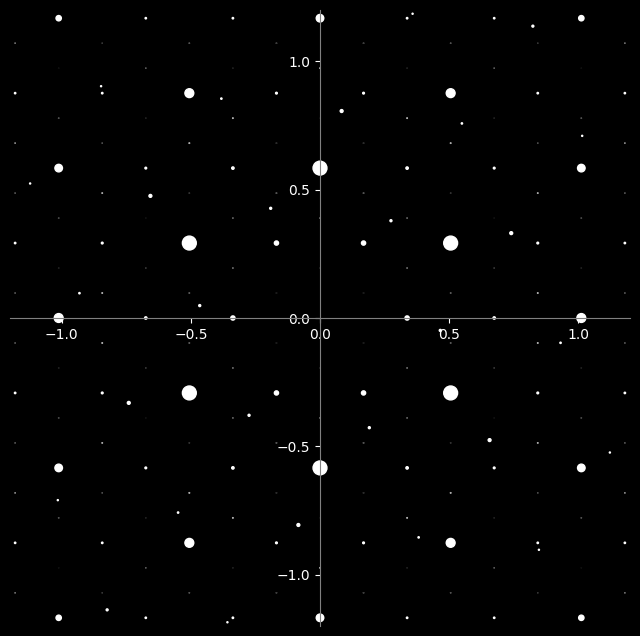


Dirección de imagen: '/images/DP-Sistema_Minimo.png'


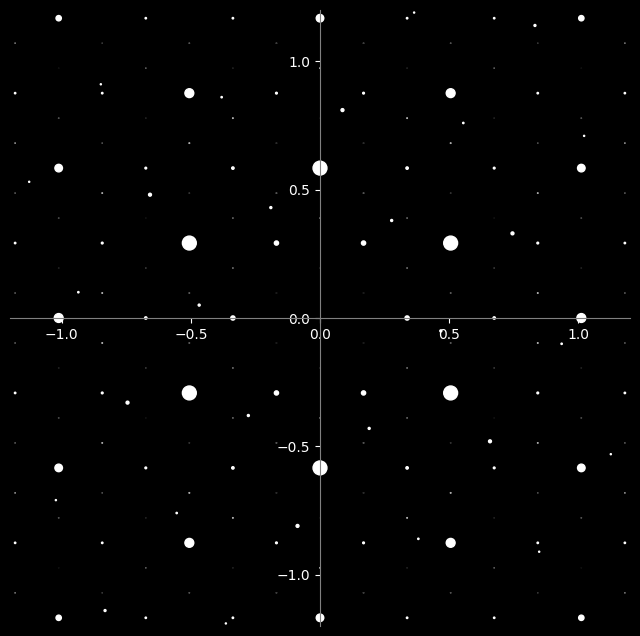

In [11]:
sOp.SuperRed.name="Sistema_Sugerido"
sMi.SuperRed.name="Sistema_Minimo"
sOp.diffractionPattern(border=1.2,prnt=True)
sMi.diffractionPattern(border=1.2,prnt=True)

## Función abreviada generateSuperCell
La función generateSuperCell(n, e) del objeto System ejecuta automáticamente y de forma consecutiva las funciones searchLP, calculateTM y optimize_system. Esto genera una copia del sistema original utilizando como celda primitiva (PC) aquella asociada a la matriz de transformación (TM) sugerida por el programa: la que presenta la menor deformación entre las matrices más pequeñas calculadas.

Esta función realiza la búsqueda en un área definida por el parámetro n, y acepta un límite máximo de deformación dado por e.

Como ejemplo del uso de la función generateSuperCell, a continuación se generará el archivo POSCAR correspondiente a la celda primitiva del sistema formado por el apilamiento de grafeno y FePS3, con un ángulo de 12.47$^\circ$, utilizando dicha función.

In [ ]:
S = System([l2, l1.mRot(12.47)])
newS = S.generateSuperCell(15,0.01,showTable=True)
newS.exportPC(PCname='Grafeno-FePS3(12_47)')